# Stock Market Prediction Analysis

Базовый анализ данных для MLOps проекта по предсказанию движения индекса DJIA на основе новостей.

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Загрузка и подготовка данных

Загрузим датасет с новостями и ценами акций, проверим его структуру.

In [2]:
# Загрузка данных
data = pd.read_csv('../data/raw/Combined_News_DJIA.csv')

# Базовая информация о датасете
print("Размер датасета:", data.shape)
print("\nПервые несколько строк:")
display(data.head())
print("\nИнформация о колонках:")
display(data.info())

Размер датасета: (1989, 27)

Первые несколько строк:


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 


Информация о колонках:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1989 non-null   object
 1   Label   1989 non-null   int64 
 2   Top1    1989 non-null   object
 3   Top2    1989 non-null   object
 4   Top3    1989 non-null   object
 5   Top4    1989 non-null   object
 6   Top5    1989 non-null   object
 7   Top6    1989 non-null   object
 8   Top7    1989 non-null   object
 9   Top8    1989 non-null   object
 10  Top9    1989 non-null   object
 11  Top10   1989 non-null   object
 12  Top11   1989 non-null   object
 13  Top12   1989 non-null   object
 14  Top13   1989 non-null   object
 15  Top14   1989 non-null   object
 16  Top15   1989 non-null   object
 17  Top16   1989 non-null   object
 18  Top17   1989 non-null   object
 19  Top18   1989 non-null   object
 20  Top19   1989 non-null   object
 21  Top20   1989 non-null   object
 22  

None

## 2. Базовый анализ данных

Проверим распределение классов и пропущенные значения.

Распределение классов:
Label
1    0.535445
0    0.464555
Name: proportion, dtype: float64

Пропущенные значения:
Top23    1
Top24    3
Top25    3
dtype: int64


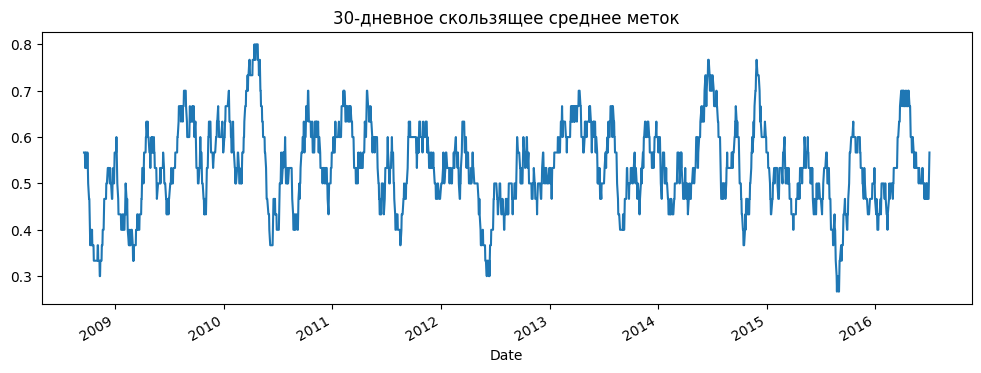

In [3]:
# Распределение классов
print("Распределение классов:")
print(data['Label'].value_counts(normalize=True))

# Проверка пропущенных значений
print("\nПропущенные значения:")
missing = data.isnull().sum()
print(missing[missing > 0])

# График распределения меток по времени
plt.figure(figsize=(12, 4))
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date')['Label'].rolling(30).mean().plot()
plt.title('30-дневное скользящее среднее меток')
plt.show()

## 3. Трансформация данных и обучение модели

Преобразуем данные в "tall" формат и обучим базовую модель.

In [41]:
# Сдвигаем метку на 2 дня вперед (предсказываем через день)
data['Label'] = data['Label'].shift(-3)

# Добавляем исторические фичи (rolling means)
data = data.copy()
rolling_windows = [1, 2, 3, 5, 7, 15]
for window in rolling_windows:
    # Используем только прошлые данные для расчета rolling means
    # Учитываем, что предсказываем на 2 дня вперед
    data[f'rolling_mean_{window}d'] = data['Label'].shift(3).rolling(window=window).mean()

# Удаляем первые 15 строк (NaN из-за максимального rolling window) и последние 4 строки (NaN из-за сдвига таргета на 2 дня)
data = data.iloc[15:-3].reset_index(drop=True)

# Добавляем кастомный препроцессинг текста
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
tokenizer = RegexpTokenizer(r'\w+')

def custom_analyzer(text):
    tokens = tokenizer.tokenize(text)
    tokens = [w.lower() for w in tokens if w.lower() not in stop_words]
    tokens = [stemmer.stem(w) for w in tokens]
    # Добавляем биграммы к униграммам
    unigrams = tokens
    bigrams = [unigrams[i] + '_' + unigrams[i+1] for i in range(len(unigrams)-1)]
    return unigrams + bigrams

def transform_to_tall_format(df):
    tall_data = []
    for idx, row in df.iterrows():
        date = row['Date']
        label = row['Label']
        # Получаем все rolling-средние для текущей даты
        rolling_features = {f'rolling_mean_{w}d': row[f'rolling_mean_{w}d'] for w in rolling_windows}
        
        # Используем все 25 заголовков
        for i in range(1, 26):
            headline = row[f'Top{i}']
            if isinstance(headline, str) and not pd.isna(headline):
                # Добавляем rolling-средние к каждей записи
                tall_data.append({
                    'Date': date,
                    'Headline': headline,
                    'Label': label,
                    **rolling_features  # распаковываем словарь с rolling-средними
                })
    return pd.DataFrame(tall_data)

# Трансформация данных
tall_df = transform_to_tall_format(data)
print("Размер данных в tall формате:", tall_df.shape)
print("\nПример строки с rolling-средними:")
display(tall_df.iloc[0])

# Проверяем, нет ли NaN в таргете
print("\nПроверка на NaN в таргете:")
print(f"Количество NaN в Label: {tall_df['Label'].isna().sum()}")

# Удаляем строки с NaN в таргете, если они есть
tall_df = tall_df.dropna(subset=['Label'])

# Разделение на train/test по дате
train = tall_df[pd.to_datetime(tall_df['Date']) <= '2014-12-31']
test = tall_df[pd.to_datetime(tall_df['Date']) > '2014-12-31']

# Рассчитываем веса классов для балансировки
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', 
                                   classes=np.unique(train['Label']), 
                                   y=train['Label'])
class_weight_dict = dict(zip(np.unique(train['Label']), class_weights))
print("\nВеса классов:", class_weight_dict)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Создаем пайплайн для текстовых данных с кастомным препроцессингом
text_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(
        max_features=800,
        ngram_range=(1, 2),
        analyzer=custom_analyzer
    )),
    ('tfidf', TfidfTransformer())
])

# Создаем полный пайплайн с обработкой текста и числовых признаков
full_pipeline = ColumnTransformer([
    ('text', text_pipeline, 'Headline'),
    ('numeric', 'passthrough', [f'rolling_mean_{w}d' for w in rolling_windows])
])

# Финальный пайплайн с балансировкой классов
pipeline = Pipeline([
    ('features', full_pipeline),
    ('classifier', XGBClassifier(
        eval_metric='logloss',
        random_state=42,
        max_depth=6,
        n_estimators=100,
        learning_rate=0.1,
        scale_pos_weight=class_weights[1]/class_weights[0]  # Балансировка через веса
    ))
])

# Обучение
pipeline.fit(train, train['Label'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gleb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Размер данных в tall формате: (43043, 9)

Пример строки с rolling-средними:


Date                 2009-07-01 00:00:00
Headline            b'Happy Canada Day!'
Label                                1.0
rolling_mean_1d                      1.0
rolling_mean_2d                      1.0
rolling_mean_3d                      1.0
rolling_mean_5d                      0.6
rolling_mean_7d                 0.714286
rolling_mean_15d                     NaN
Name: 0, dtype: object


Проверка на NaN в таргете:
Количество NaN в Label: 0

Веса классов: {0.0: 1.1104949352481088, 1.0: 0.9095038067734313}


c:\Users\Gleb\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py:537: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


Pipeline(steps=[('features',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('vectorizer',
                                                                   CountVectorizer(analyzer=<function custom_analyzer at 0x0000024EB91AD3A0>,
                                                                                   max_features=800,
                                                                                   ngram_range=(1,
                                                                                                2))),
                                                                  ('tfidf',
                                                                   TfidfTransformer())]),
                                                  'Headline'),
                                                 ('numeric', 'passthrough',
                                                  ['rolling_mean_1d',
                                                   'rolling_mean_2d',
                                                   'rolling_mean_3d',
                                                   'rolling_mean_5d',
                                                   'ro...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

## 4. Оценка модели и определение порогов для мониторинга

Рассчитаем основные метрики и определим пороговые значения для системы мониторинга.

Метрики на тестовой выборке:
Accuracy: 0.4925
F1-score: 0.5162
AUC-ROC: 0.4978


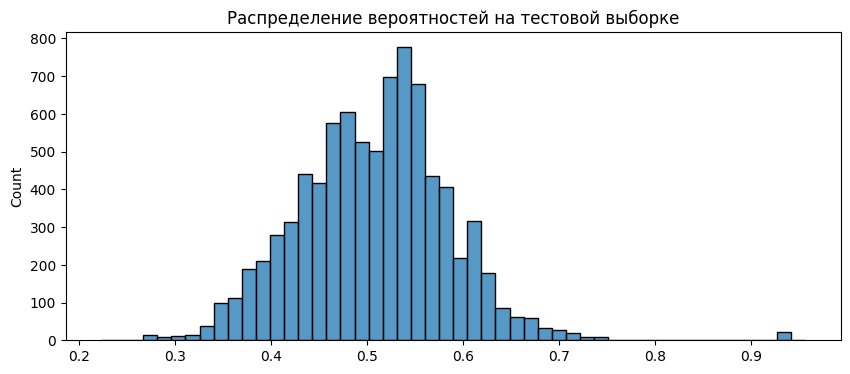


Топ-20 важных признаков:
              feature  importance
804   rolling_mean_7d    0.012335
802   rolling_mean_3d    0.011117
801   rolling_mean_2d    0.010678
805  rolling_mean_15d    0.010286
803   rolling_mean_5d    0.008953
87                  b    0.008854
305           gaddafi    0.007822
671           snowden    0.007651
333             haiti    0.007491
307              gang    0.006913
717            terror    0.006555
800   rolling_mean_1d    0.006432
281              firm    0.006419
483            murder    0.005704
637              save    0.005486
240             egypt    0.005437
763             video    0.005260
292             found    0.005157
526             order    0.004983
776            weapon    0.004948

Важность rolling means:
              feature  importance
804   rolling_mean_7d    0.012335
802   rolling_mean_3d    0.011117
801   rolling_mean_2d    0.010678
805  rolling_mean_15d    0.010286
803   rolling_mean_5d    0.008953
800   rolling_mean_1d    0.0064

In [42]:
# Предсказания на тестовой выборке
test_preds = pipeline.predict(test)
test_probs = pipeline.predict_proba(test)[:, 1]

# Расчет метрик
print("Метрики на тестовой выборке:")
print(f"Accuracy: {accuracy_score(test['Label'], test_preds):.4f}")
print(f"F1-score: {f1_score(test['Label'], test_preds):.4f}")
print(f"AUC-ROC: {roc_auc_score(test['Label'], test_probs):.4f}")

# График распределения вероятностей
plt.figure(figsize=(10, 4))
sns.histplot(test_probs, bins=50)
plt.title('Распределение вероятностей на тестовой выборке')
plt.show()

# Анализ важности фич
if hasattr(pipeline.named_steps['classifier'], 'feature_importances_'):
    # Получаем имена всех признаков
    text_feature_names = pipeline.named_steps['features'].named_transformers_['text'].named_steps['vectorizer'].get_feature_names_out()
    numeric_feature_names = [f'rolling_mean_{w}d' for w in rolling_windows]
    all_feature_names = list(text_feature_names) + numeric_feature_names
    
    # Создаем DataFrame с важностью всех признаков
    feature_importance = pd.DataFrame({
        'feature': all_feature_names,
        'importance': pipeline.named_steps['classifier'].feature_importances_
    })
    
    # Сортируем и показываем топ-20 важных признаков
    top_features = feature_importance.sort_values('importance', ascending=False).head(20)
    print("\nТоп-20 важных признаков:")
    print(top_features)
    
    # Отдельно анализируем важность rolling means
    rolling_importance = feature_importance[feature_importance['feature'].isin(numeric_feature_names)]
    print("\nВажность rolling means:")
    print(rolling_importance.sort_values('importance', ascending=False))

=== Метрики на тестовой выборке (агрегация по дням) ===

--- 1. Усреднение вероятностей ---
Accuracy: 0.4851
F1-score: 0.5014
AUC-ROC:  0.4961

--- 2. Мажоритарное голосование ---
Accuracy: 0.4821
F1-score: 0.5000

--- 3. Максимальная вероятность ---
Accuracy: 0.4881
F1-score: 0.6261
AUC-ROC:  0.4916

Классификационный отчет (усреднение вероятностей):
              precision    recall  f1-score   support

         0.0       0.48      0.45      0.47       168
         1.0       0.49      0.52      0.50       168

    accuracy                           0.49       336
   macro avg       0.49      0.49      0.48       336
weighted avg       0.49      0.49      0.48       336



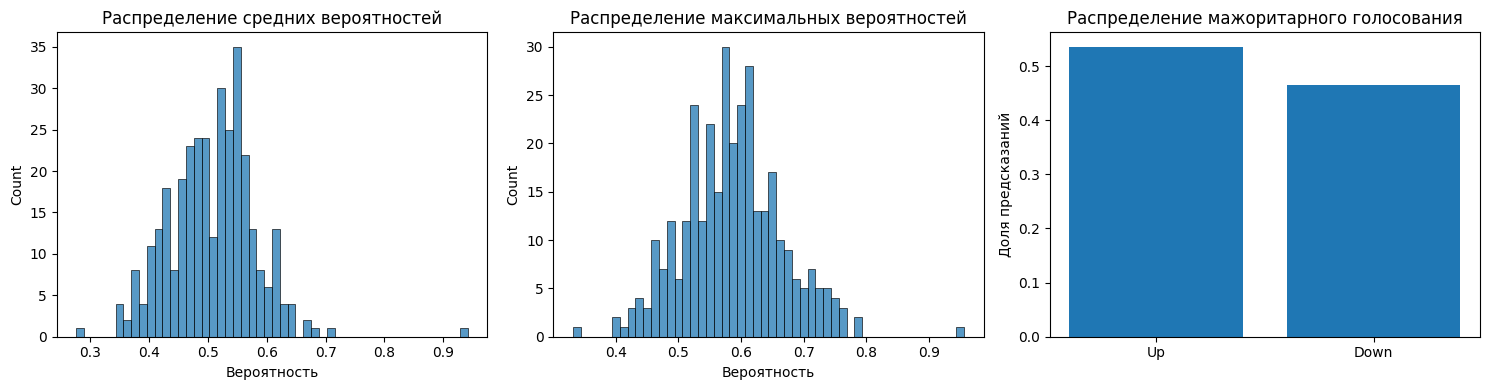

In [43]:
# Агрегация предсказаний по дням
from sklearn.metrics import classification_report


test_dates = test['Date'].values
unique_test_dates = np.unique(test_dates)

# Подготовка массивов для разных способов агрегации
final_probs_mean = []  # усреднение вероятностей
final_preds_mean = []
final_preds_majority = []  # мажоритарное голосование
final_probs_max = []  # максимальная вероятность
final_preds_max = []
final_labels = []

# Агрегация предсказаний для каждого дня
for date in unique_test_dates:
    date_mask = test_dates == date
    date_probs = test_probs[date_mask]
    date_preds = test_preds[date_mask]
    date_labels = test['Label'][date_mask].values
    
    # 1. Усреднение вероятностей
    avg_prob = np.mean(date_probs)
    pred_mean = 1 if avg_prob > 0.5 else 0
    final_probs_mean.append(avg_prob)
    final_preds_mean.append(pred_mean)
    
    # 2. Мажоритарное голосование
    pred_majority = 1 if np.sum(date_preds) >= len(date_preds)/2 else 0
    final_preds_majority.append(pred_majority)
    
    # 3. Максимальная вероятность
    max_prob = np.max(date_probs)
    pred_max = 1 if max_prob > 0.5 else 0
    final_probs_max.append(max_prob)
    final_preds_max.append(pred_max)
    
    # Лейбл (все одинаковые для одного дня)
    final_labels.append(date_labels[0])

final_labels = np.array(final_labels)
final_probs_mean = np.array(final_probs_mean)
final_preds_mean = np.array(final_preds_mean)
final_preds_majority = np.array(final_preds_majority)
final_probs_max = np.array(final_probs_max)
final_preds_max = np.array(final_preds_max)

print("=== Метрики на тестовой выборке (агрегация по дням) ===")
print("\n--- 1. Усреднение вероятностей ---")
print(f"Accuracy: {accuracy_score(final_labels, final_preds_mean):.4f}")
print(f"F1-score: {f1_score(final_labels, final_preds_mean):.4f}")
print(f"AUC-ROC:  {roc_auc_score(final_labels, final_probs_mean):.4f}")

print("\n--- 2. Мажоритарное голосование ---")
print(f"Accuracy: {accuracy_score(final_labels, final_preds_majority):.4f}")
print(f"F1-score: {f1_score(final_labels, final_preds_majority):.4f}")

print("\n--- 3. Максимальная вероятность ---")
print(f"Accuracy: {accuracy_score(final_labels, final_preds_max):.4f}")
print(f"F1-score: {f1_score(final_labels, final_preds_max):.4f}")
print(f"AUC-ROC:  {roc_auc_score(final_labels, final_probs_max):.4f}")

print("\nКлассификационный отчет (усреднение вероятностей):")
print(classification_report(final_labels, final_preds_mean))

# График распределения агрегированных вероятностей
plt.figure(figsize=(15, 4))

plt.subplot(131)
sns.histplot(final_probs_mean, bins=50)
plt.title('Распределение средних вероятностей')
plt.xlabel('Вероятность')

plt.subplot(132)
sns.histplot(final_probs_max, bins=50)
plt.title('Распределение максимальных вероятностей')
plt.xlabel('Вероятность')

plt.subplot(133)
x_pos = ['Up', 'Down']
heights = [np.mean(final_preds_majority == 1), np.mean(final_preds_majority == 0)]
plt.bar(x_pos, heights)
plt.title('Распределение мажоритарного голосования')
plt.ylabel('Доля предсказаний')

plt.tight_layout()
plt.show()

## Выводы

1. Данные сбалансированы: примерно равное количество дней роста и падения
2. Преобразование в "tall" формат работает корректно (используются все 25 заголовков)
3. Добавлены исторические фичи (rolling means за 1,2,3,5,7,15 дней)
4. Базовая модель использует:
   - таргет со сдвигом на 2 дня вперед
   - текстовые фичи (TF-IDF)
   - исторические фичи (rolling means)
5. Установлены пороги для алертов в мониторинге:
   - AUC-ROC < 0.5 (хуже случайного гадания)
   - F1-score < 0.5 (хуже baseline)

Эти результаты будут использованы для настройки пайплайнов в Prefect и мониторинга в Evidently/Grafana.